In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data =  []

In [202]:
df = pd.read_csv('./data_9.csv')
pos = df['Station_Name'].drop_duplicates().tolist()
for ind,i in enumerate(pos):
    ori = df[df['Station_Name'] == i].to_numpy()
    if ori.shape[0] != 720:
        continue
    data.append(ori)
np.save('./data_9.npy',data)

In [150]:
data = np.load('./data_9.npy',allow_pickle=True)
# S, _, D = data.shape
route = []
for k in range(len(data)):
    dt = pd.DataFrame(data[k])
    
    # data.shape
    for i in range(len(data)):
        dt[1][i] = str(dt[5][i])+'-'+str(dt[6][i])+'-'+str(dt[7][i])+'-'+str(dt[8][i])
    dt.drop([0,1,5,6,7,8],axis=1,inplace=True)
    pl  = dt.mean().tolist()
    route.append(pl)

np.array(route).shape    
# plt.plot(range(len(rain_drop)),rain_drop)

(718, 10)

In [200]:
from datetime import datetime, timedelta

data = np.load('./data_9.npy',allow_pickle=True)

aps = datetime(data[0][0][5],data[0][0][6],data[0][0][7],data[0][0][8])
# print(aps+timedelta(hours=10))
print(aps.strftime("%Y-%m-%d-%H"))
tje = []
for i in range(720):
    tje.append((aps+timedelta(hours=i)).strftime("%Y-%m-%d-%H"))

data_new = []
for i in range(len(data)):
    dt = pd.DataFrame(data[i])
    dt[1] = tje
    dt.drop([0,5,6,7,8],axis=1,inplace=True)
    data_new.append(dt.to_numpy())

data = np.array(data_new)

data = data[:,:,[0,7,3,4,5,6]]
np.save('./raindrop.npy',data)

2020-09-01-00


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [125]:
route = np.array(route)
route = pd.DataFrame(route)
route

,0,1,2,3,4,5,6,7,8,9
0,29.9833,103.0000,627.600000,21.403611,18.527500,85.079167,0.265278,169.962500,1.203472,22.908056
1,29.8878,102.2131,1403.200043,19.050278,15.106389,80.329167,0.120694,190.705556,2.006389,21.302778
2,29.7875,102.8444,797.500000,19.893333,17.194306,85.575000,0.168472,151.002778,1.638611,22.080278
3,29.3436,102.6367,1098.000000,19.446667,16.856944,86.162500,0.129722,160.545833,1.739583,22.046667
4,29.2333,102.3500,890.700000,20.706806,17.674028,83.754167,0.139444,224.372222,1.577083,21.690833
...,...,...,...,...,...,...,...,...,...,...
713,18.7667,109.5167,328.500000,26.055278,23.147083,85.095833,0.430000,141.383333,1.567917,29.353889
714,18.6500,109.7000,68.600000,27.666389,24.881806,86.081944,0.504722,133.847222,1.163472,30.985000
715,18.2244,109.5897,419.400000,25.907639,24.248194,90.897222,0.602361,133.588889,3.982917,28.675000
716,18.8000,110.3333,39.900000,27.996250,25.120417,85.416667,0.417222,183.111111,1.950556,32.251944


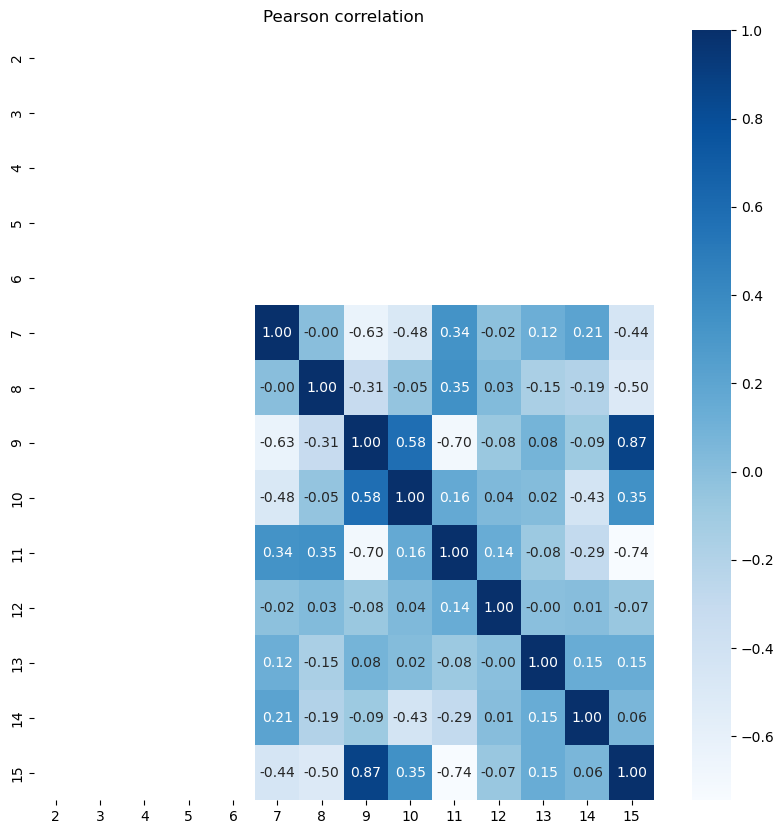

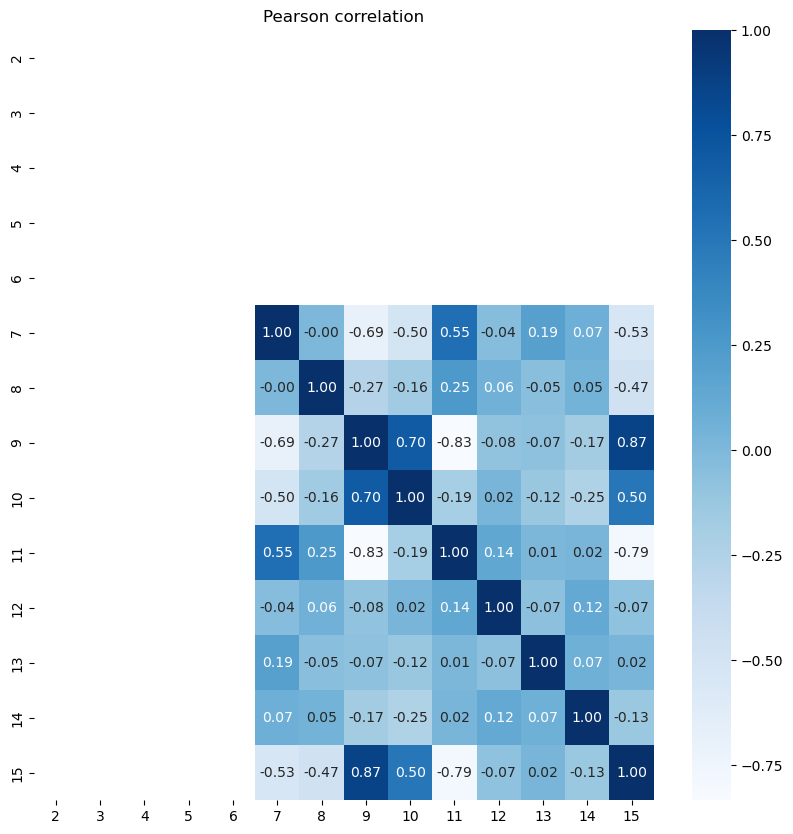

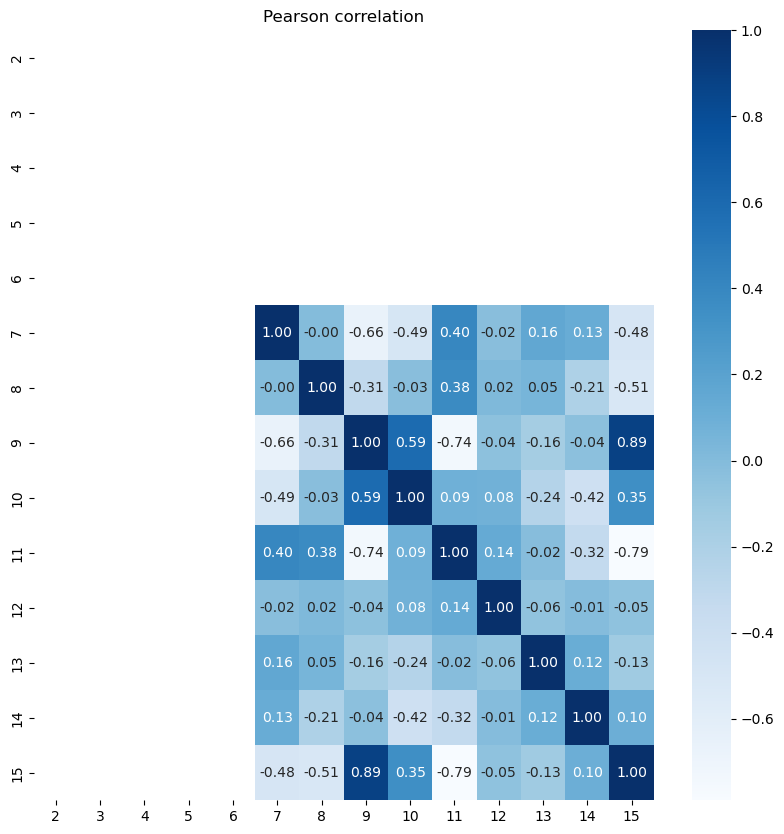

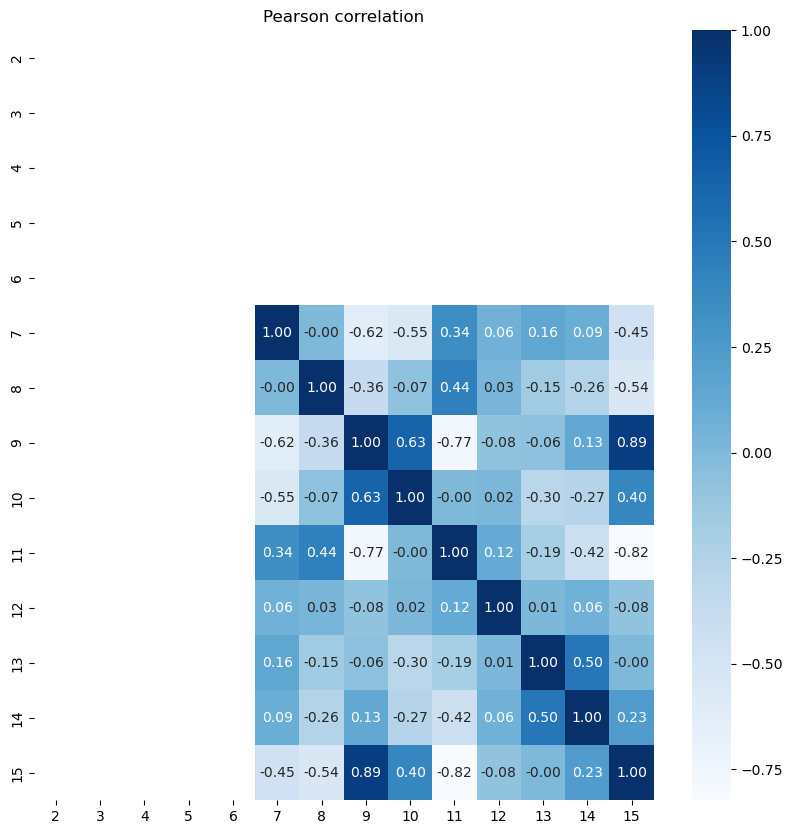

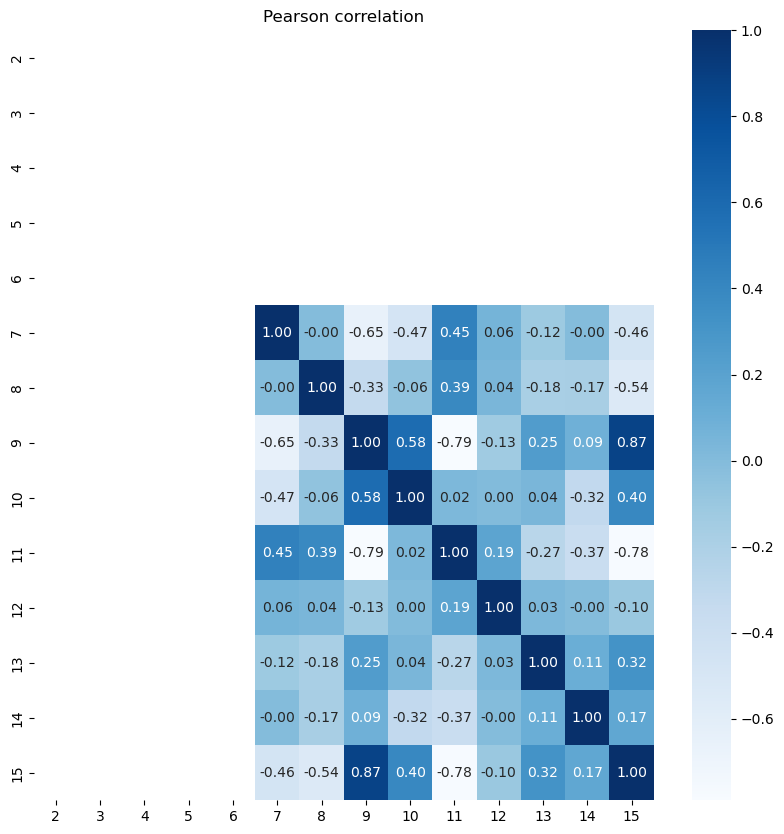

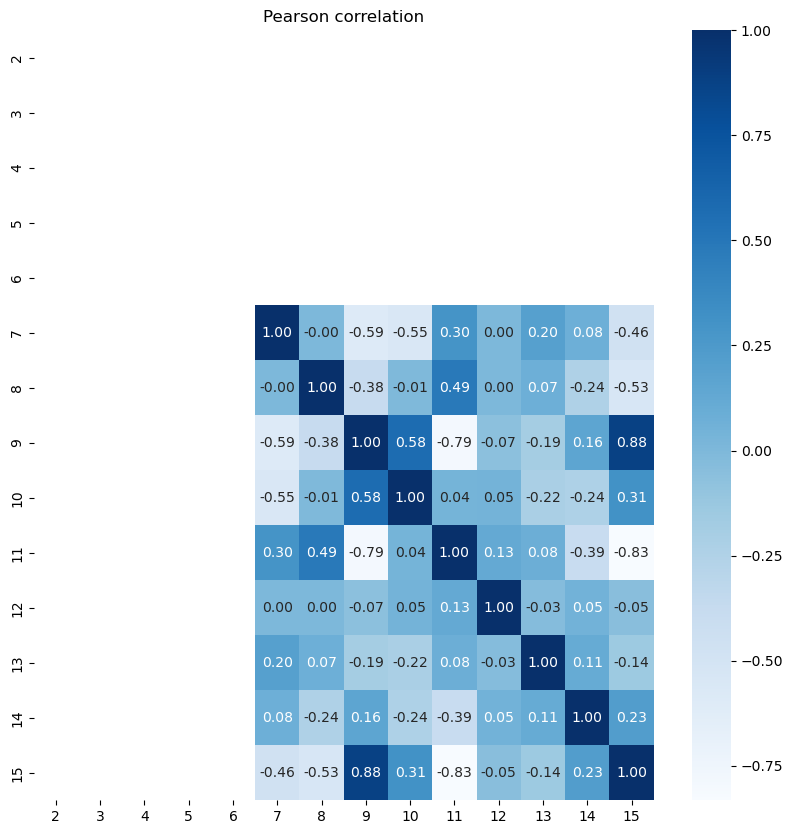

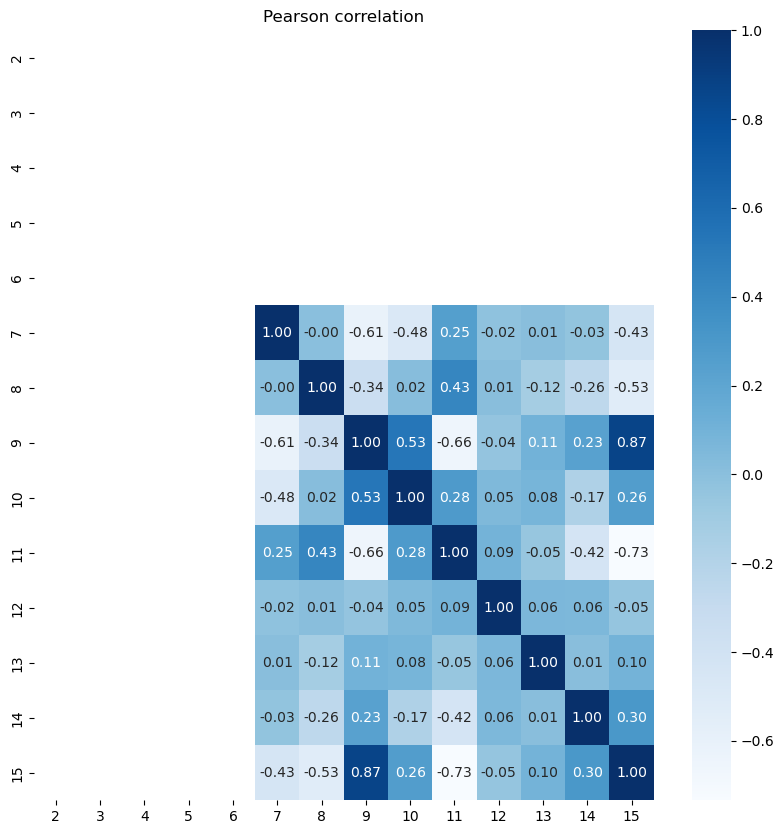

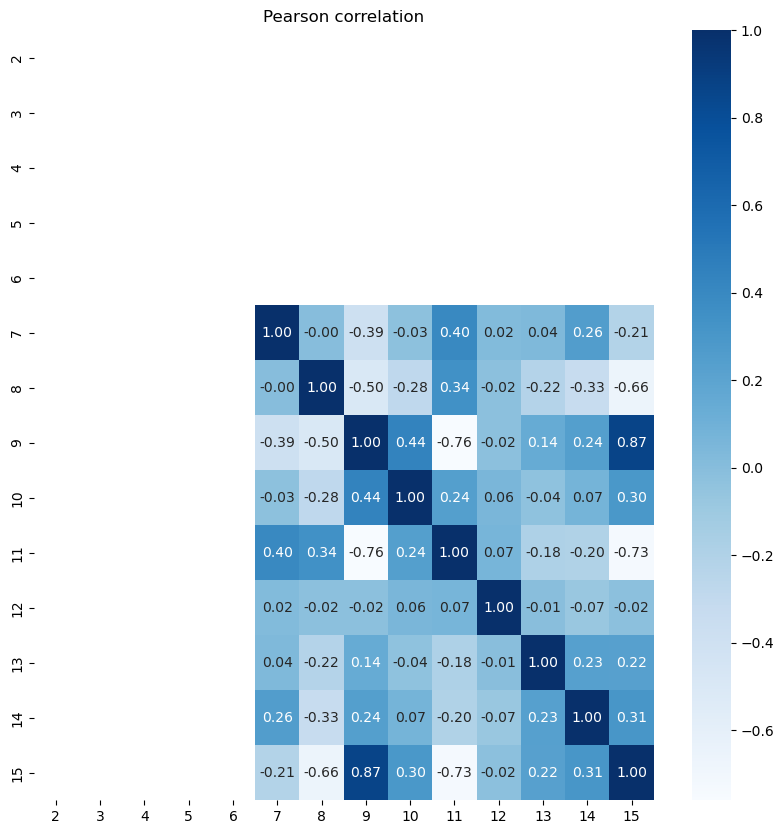

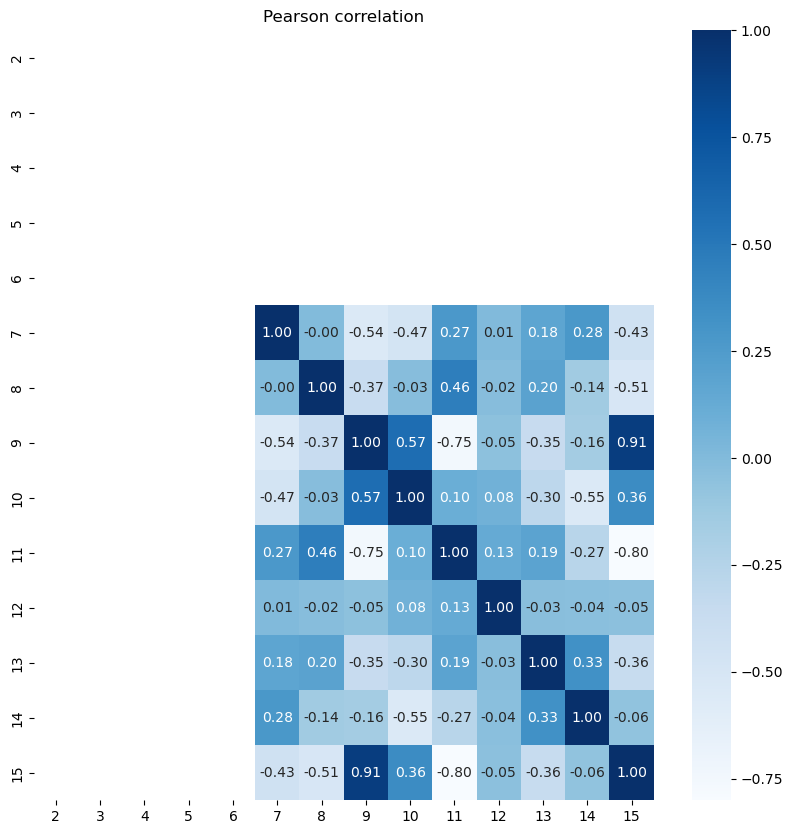

In [149]:
def find_correlation(data: pd.DataFrame):
    corr = data.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Pearson correlation')
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
    plt.show()
for i in range(540,549):
    als  =pd.DataFrame(data[i])
    als.drop([0,1],axis=1,inplace=True)
    find_correlation(als)